## The Mean

Is a measure of central tendency that is obtained by taking the sum of values diving  by the total number of values in the distribution

In [1]:
distribution = [0,2,3,3,3,4,13]
mean = sum(distribution) / len(distribution)
center = False

above = []
below = []

for value in distribution:
    if value < mean:
        below.append(mean - value)
    if value > mean:
        above.append(value - mean)
        
equal_distances = (sum(above) == sum(below))

In [2]:
equal_distances

True

From above, we can think of the mean as the value located at that particular point in the distribution where the total distance of the values below the mean is the same as the total distance of the values that are above the mean.

##  Task

Generate 5000 different distributions, measure the total distances above and below the mean, and check whether they are equal. For each of the 5000 iterations of a for loop:

+ Set a seed using the seed() function from numpy.random. For the first iteration, the seed number should be 0, for the second iteration it should be 1, for the third it should be 2, and so on.
+ Generate randomly a distribution of integers using the `randint()` function from numpy.random. Pass the right arguments to randint() such that each distribution will:

        + Have 10 values.
        + The values can range from 0 to 1000.
+ Compute the mean of the distribution.
+ Measure the total distance above and below the mean.

       + Round off each distance to 1 decimal place using the `round()` function. This will prevent rounding errors at the 13th or 14th decimal place.
+ Compare the two sums. If they are equal, then increment a variable named equal_distances with 1. You'll need to define equal_distances outside the loop with a value of 0.

At the end equal_distances should have a value of 5000. This will confirm that for each of the 5000 distributions the total distance of the values above the mean is equal to the total distance of the values below the mean.


In [1]:
from numpy.random import randint, seed
equal_distances = 0

for i in range(5000):
    seed(i)
    distribution = randint(0,1000,10)
    mean = sum(distribution) / len(distribution)
    
    above = []
    below = []
    for value in distribution:
        if value == mean:
            continue # continue with the next iteration because the distance is 0
        if value < mean:
            below.append(mean - value)
        if value > mean:
            above.append(value - mean)
    
    sum_above = round(sum(above),1)
    sum_below = round(sum(below),1)
    if (sum_above == sum_below):
        equal_distances += 1

In [2]:
equal_distances

5000

Creating a function for calculating mean

In [3]:
distribution_1 = [42, 24, 32, 11]
distribution_2 = [102, 32, 74, 15, 38, 45, 22]
distribution_3 = [3, 12, 7, 2, 15, 1, 21]
def mean(distribution):
    sum_distribution = 0
    for value in distribution:
        sum_distribution += value
        
    return sum_distribution / len(distribution)

mean_1 = mean(distribution_1)
mean_2 = mean(distribution_2)
mean_3 = mean(distribution_3)

### Introducing the dataset

We'll be working with a data set that describes characteristics of houses sold between 2006 and 2010 in the city of Ames (located in the American state of Iowa). There are 2930 rows in the data set, and each row describes a house. For each house there are 82 characteristics described, which means there are 82 columns in the data set. 

A paper which describes the dataset [Ames Housing Dataset Details](data/Ames%20Iowa%20Alternative%20to%20the%20Boston%20Housing%20Data%20as%20an%20End%20of%20Semester%20Regression%20Project.pdf)

In [1]:
import pandas as pd

houses = pd.read_table('data/AmesHousing_1.txt')

Distribution of sales prices of houses

In [2]:
houses['SalePrice'].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

We can see that the distribution has a large range: the minimum sale price is $12789 while the maximum is $755000. Among this diversity of prices, we can see that the mean (or the "balance point") of this distribution is approximately $180796. The mean gives us a sense about the typical sale price in this distribution of 2930 prices.

Calculating just the mean

In [3]:
houses['SalePrice'].mean()

180796.0600682594

Comparing means calculated by two different ways

In [4]:
def mean(distribution):
    sum_distribution = 0
    for value in distribution:
        sum_distribution += value
        
    return sum_distribution / len(distribution)
function_mean = mean(houses['SalePrice'])
pandas_mean = houses['SalePrice'].mean()
means_are_equal = (function_mean == pandas_mean)

### Estimating population mean

In the exercise below, we'll try to visualize on a scatter plot how the sampling error changes as we increase the sample size. Just to prove a point, we'll assume that our data set describes all the houses sold in Ames, Iowa between 2006 and 2010.

#### Instructions



1. Compute the mean of the SalePrice variable. We'll assume that the data we have is a population relative to the question "What's the mean sale price of a house in Ames, Iowa for the period 2006-2010?".

2. For each iteration of a for loop that iterates 101 times:

  + Sample the SalePrice distribution using the Series.sample() method.

    + For the first iteration, the random_state parameter is 0, for the second iteration is 1, for the third is 2, and so on.
    + For the first iteration, the sample size is 5.
    + The last sample size is 2905 (which is close to 2930, the population's size).
    + To achieve that, you'll need to increment the sample size by 29 for every new iteration. Note that you'll first have to define the sample size with a value of 5 outside the loop.
    
 + Compute the sample mean.
 + Compute the sampling error. For answer checking purposes, use parameter−statistic, not statistic−parameter

3. Generate a scatter plot to represent visually how the sampling error changes as the sample size increases.

+ Place the sample sizes on the x-axis.
+ Place the sampling errors on the y-axis.
+ Use `plt.axhline()` to generate a horizontal line at 0 to illustrate the point where the sampling error is 0.
+ Use `plt.axvline()` to generate a vertical line at 2930 to illustrate the population size.
+ Label the x-axis "Sample size".
+ Label the y-axis "Sampling error".

Text(0, 0.5, 'Sampling error')

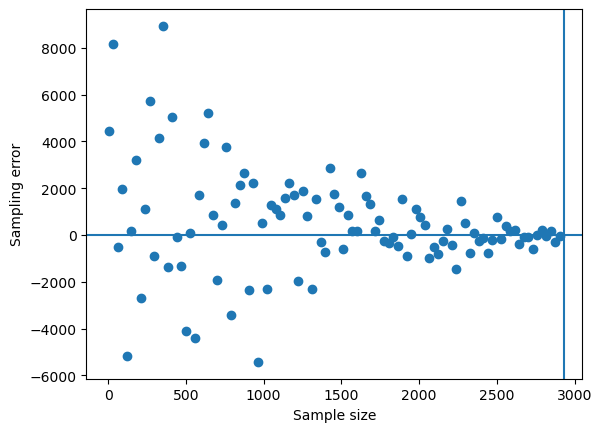

In [5]:
parameter = houses['SalePrice'].mean()
sample_size = 5

sample_sizes = []
sampling_errors = []

for i in range(101):
    sample = houses['SalePrice'].sample(sample_size , random_state = i)
    statistic = sample.mean()
    sampling_error = parameter - statistic
    sampling_errors.append(sampling_error)
    sample_sizes.append(sample_size)
    sample_size += 29
    
import matplotlib.pyplot as plt
plt.scatter(sample_sizes, sampling_errors)
plt.axhline(0)
plt.axvline(2930)
plt.xlabel('Sample size')
plt.ylabel('Sampling error')

As seen above, the general tendency for the sampling error is to decrease as the sample size increases. This tendency, however, has exceptions. For instance, there are cases where small sample sizes (100-500 sample points) gave us better estimates for the population mean μ than large sample sizes (2500 sample points or more) did.

![Smaller samples better](img/s2m1_smaller_samples_better.svg)

For any given sample size, we can have many combinations of values. For instance, for a sample size of 3, we can have many possible combinations of sale prices: [220000, 143000, 281000], [123600, 209500, 202665], [287000, 142500, 440000], etc. Most of the samples of size 3 will give a good estimate of the population mean μ

To prove this point, in the code below we will:

+ Measure the mean for 10000 samples of size 3.
+ Use a histogram to visualize the distribution of the sample means.
+ Draw a vertical line corresponding to the population mean μ

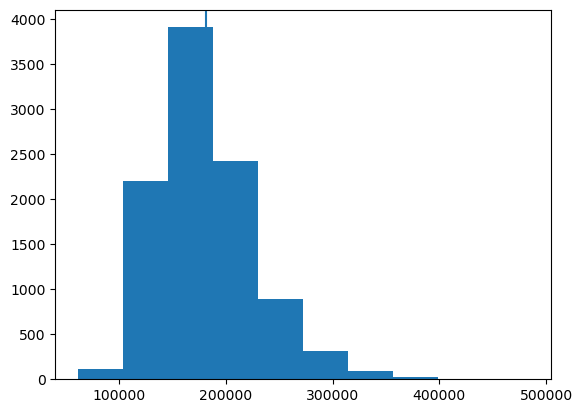

In [6]:
means = []
for i in range(10000):
    sample = houses['SalePrice'].sample(3, random_state=i)
    means.append(sample.mean())

plt.hist(means)
plt.axvline(houses['SalePrice'].mean())

We can see that most sample means cluster around the population mean. This means that when we take a sample of size 3 and compute ¯x, we have fairly good chances to get a good estimate for the population mean μ. This explains what we've seen in the scatter plot above, where we got good estimates from low-sized samples.

#### Instructions

Take 10000 samples of sample size 100 from the population of sale prices and measure the mean of each sample. For each of the 10000 iterations of a for loop:

+ Use `Series.sample()` to take a sample of size 100 from the SalePrice variable. The random_state parameter is 0 for the first iteration, 1 for the second iteration, 2 for the third iteration, and so on.
+ Compute the mean of the sample.

+ Use `plt.hist()` to generate a histogram to visualize the distribution of sample means.

 + Draw a vertical line for the population mean.
 + Label the x-axis "Sample mean".
 + Label the y-axis "Frequency".
 + Set the range of the x-axis to (0,500000). This is the same range as the histogram we built above has. Can you observe any obvious difference between the two histograms now that we've increased the sample size?


(0.0, 500000.0)

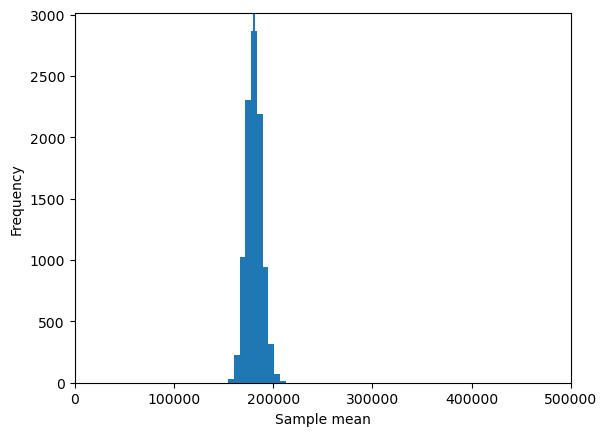

In [7]:
means = []

for i in range(10000):
    sample = houses['SalePrice'].sample(100, random_state=i)
    means.append(sample.mean())
    
plt.hist(means)
plt.axvline(houses['SalePrice'].mean())
plt.xlabel('Sample mean')
plt.ylabel('Frequency')
plt.xlim(0,500000)

Generally, as we increase the sample size, there will be less and less variability around the population mean. If there's less variability, there are less chances to get a poor estimate for the population mean — the worst sample means we can get are fairly close to the population mean, which is good.

Larger sample sizes are best estimators of population mean

![Variability](img/s2m1_sampling_distros.png)

#### Mean as Unbiased Estimator

For many possible sampling combinations the mean will be the same

When a statistic is on average equal to the parameter it estimates, we call that statistic an unbiased estimator. In our case, the sample mean ¯x is an unbiased estimator for the population mean μ

In [8]:
population = [3, 7, 2]
samples = [[3, 7], [3, 2],
           [7, 2], [7, 3],
           [2, 3], [2, 7]
          ]

sample_means = []
for sample in samples:
    sample_means.append(sum(sample) / len(sample))
    
population_mean = sum(population) / len(population)
mean_of_sample_means = sum(sample_means) / len(sample_means)

unbiased = (population_mean == mean_of_sample_means)

### Weighted Mean

The weighted arithmetic mean is similar to an ordinary arithmetic mean (the most common type of average), except that instead of each of the data points contributing equally to the final average, some data points contribute more than others. The notion of weighted mean plays a role in descriptive statistics and also occurs in a more general form in several other areas of mathematics. 

### Finding Median

+ Find the median value of the TotRms AbvGrd column. [Total rooms above the ground]

+ Sort the values in the column in ascending order.
    
    + Replace the '10 or more' value with the integer 10 using the `Series.replace()` method. We do this only for sorting purposes. To avoid modifying the data in the original data set, make a copy of the column using the `Series.copy()` method and save it to a distinct variable.
    + Convert the column to the int type using the `Series.astype()` method.
    + Sort the values in ascending order using the `Series.sort_values()` method.

+  Depending on whether the distribution has an odd or even number of values, find the median and assign it to a variable named median.


In [10]:
houses['TotRms AbvGrd'].value_counts()

6             844
7             649
5             586
8             347
4             203
9             143
10 or more    131
3              26
2               1
Name: TotRms AbvGrd, dtype: int64

In [9]:
houses_new = houses.copy()
houses_new['TotRms AbvGrd'] = houses_new['TotRms AbvGrd'].replace('10 or more', 10)
houses_new['TotRms AbvGrd'] = houses_new['TotRms AbvGrd'].astype('int')
houses_new['TotRms AbvGrd'].sort_values().iloc[1464:1466]
median=6

#### Median a resistant statistic

+ The `Lot Area` and `SalePrice` variables have outliers. Confirm this information by visualizing the distributions using a box plot. Remember from the previous course that outliers will appear as dots on the graph.
    + You can use the `Series.plot.box()` method.
    
+ Compute the median and the mean for each of the two variables.
    + Because the variables are numerical, you can use the `Series.median()` method and the `Series.mean()` method.

+  For each variable, compute the difference between the mean and the median. 
    + Assign the difference for the Lot Area column to a variable named lotarea_difference.
    + Assign the difference for the SalePrice column to a variable named saleprice_difference.
    + Inspect the differences. Do you find the differences large?


<AxesSubplot:>

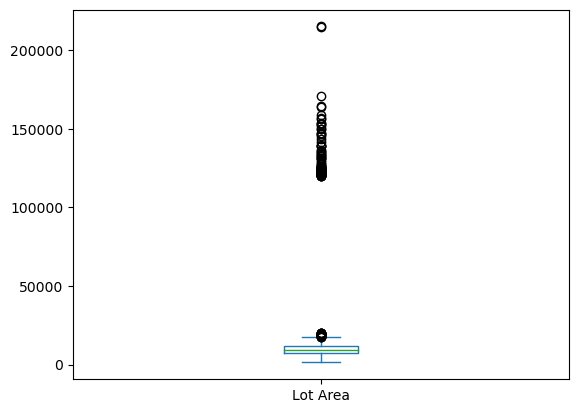

In [11]:
houses['Lot Area'].plot.box()

<AxesSubplot:>

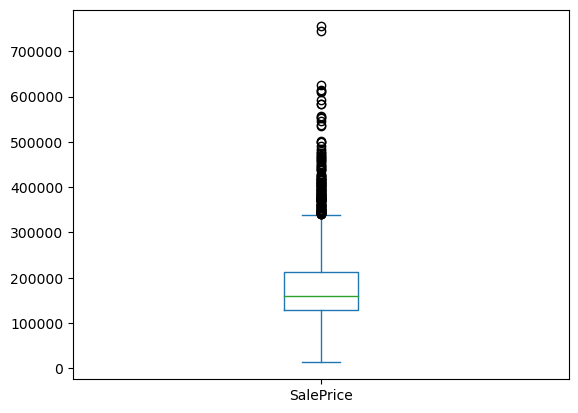

In [12]:
houses['SalePrice'].plot.box()


In [13]:
a= houses['Lot Area'].median()
b=houses['SalePrice'].median()
c=houses['Lot Area'].mean()
d=houses['SalePrice'].mean()
lotarea_difference=c-a
saleprice_difference=d-b

In [14]:
lotarea_difference

3680.7051194539254

In [16]:
saleprice_difference

20796.060068259394

### The Median for Ordinal Scales

Data points belonging to ordinal variables are often coded using numbers. Consider the frequency distribution of the Overall Cond variable, which rates the overall condition of a house:

In [17]:
houses['Overall Cond'].value_counts().sort_index()

1       7
2      10
3      50
4     101
5    1654
6     533
7     390
8     144
9      41
Name: Overall Cond, dtype: int64

Because words like "fair" or "average" are coded with numbers, it becomes mathematically possible to compute the mean. But whether or not it's theoretically sound to compute the mean for ordinal variables is contentious.

The numerical values of an ordinal variable are not subject to meaningful arithmetical operations. But computing the mean involves meaningful arithmetical operations, so it's not theoretically sound to use the mean for ordinal variables.

Because the median doesn't involve arithmetical operations, it's considered a better alternative to the mean. This doesn't fully apply, however, to even-numbered distributions, where we need to take the mean of the middle two values to find the median.

Find the mean and the median of the Overall Cond variable.

+ Assign the mean to a variable named mean.
+ Assign the median to a variable named median.

Plot a histogram to visualize the distribution of the Overall Cond variable. Between the mean and the median, which one do you think describes better the shape of the histogram?

+ If you think it's the mean, assign the string 'mean' to a variable named more_representative, otherwise assign 'median'

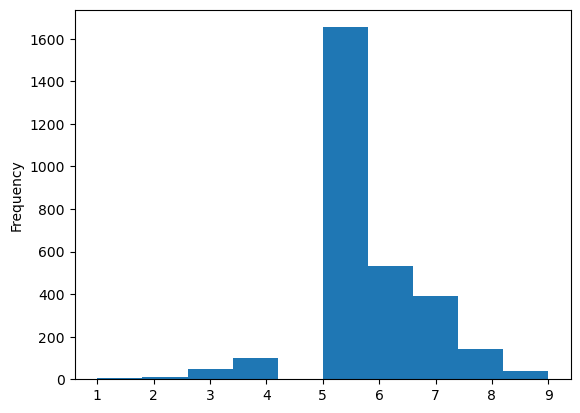

In [18]:
mean = houses['Overall Cond'].mean()
median =  houses['Overall Cond'].median()

houses['Overall Cond'].plot.hist()

more_representative = 'mean'

Although it can be argued that it's theoretically unsound to compute the mean for ordinal variables, in the last exercise we found the mean more informative and representative than the median. The truth is that in practice many people get past the theoretical hurdles and use the mean nonetheless because in many cases it's much richer in information than the median.

## Mode

+ Th most frequent value in a distribution
+ `Series.mode()`
Start from this task

1. Explore the Land Slope column to find its scale of measurement. Refer to the documentation to find the data dictionary of this column.

 + Assign your answer as a string to the variable scale_land. Depending on the scale of measurement, choose between these following strings: 'nominal', 'ordinal', 'interval', and 'ratio'.

2. Explore the Roof Style variable and find its scale of measurement. Assign your answer as a string to a variable named scale_roof (choose between the four strings listed above).

+ What measure of average would you choose for this column?

3. Explore the Kitchen AbvGr variable and determine whether it's continuous or discrete. Assign your answer as a string to a variable named kitchen_variable — the string should be either 'continuous', or 'discrete'

In [20]:
houses['Land Slope'].describe()

count     2930
unique       3
top        Gtl
freq      2789
Name: Land Slope, dtype: object

In [27]:
houses['Land Slope'].unique()

array(['Gtl', 'Mod', 'Sev'], dtype=object)

In [21]:
houses['Land Slope'].value_counts()

Gtl    2789
Mod     125
Sev      16
Name: Land Slope, dtype: int64

In [28]:
houses['Land Slope'].mode()

0    Gtl
Name: Land Slope, dtype: object

A custom function for mode
Write a function that takes in an array of values (including strings) and returns the mode of that array. Inside the function's definition:

+ Initialize an empty dictionary.

+ Loop through the values of the array that the function takes in. For each iteration of the loop:

  + If the value is already a key in the dictionary we initialized before the loop, increment its dictionary value by 1.
  + Else, define the value as a key in the dictionary, and set the initial dictionary value to 1.



In [29]:
def mode(array):
    counts = {}
    
    for value in array:
        if value in counts:
            counts[value] += 1
        else:
            counts[value] = 1
    
    return max(counts, key = counts.get)

In [22]:
scale_land = 'ordinal'

houses['Roof Style'].describe()

count      2930
unique        6
top       Gable
freq       2321
Name: Roof Style, dtype: object

In [24]:
houses['Roof Style'].value_counts()

Gable      2321
Hip         551
Gambrel      22
Flat         20
Mansard      11
Shed          5
Name: Roof Style, dtype: int64

In [25]:
scale_roof = 'nominal'

In [26]:
houses['Kitchen AbvGr'].head()

0    1
1    1
2    1
3    1
4    1
Name: Kitchen AbvGr, dtype: int64

## Skewed Distributions

When we plot a histogram or a kernel density plot to visualize the shape of a distribution, the mode will always be the peak of the distribution. In the code below, we plot a kernel density plot to visualize the shape of the SalePrice variable and:

+ Set the limits of the x-axis using the xlim parameter — the lowest limit is the minimum value in the SalePrice variable, and the upper limit is the maximum value.
+ Plot a vertical line to indicate the position of the mode (note that our estimate of 150000 from the last exercise is quite close to the peak of the distribution).

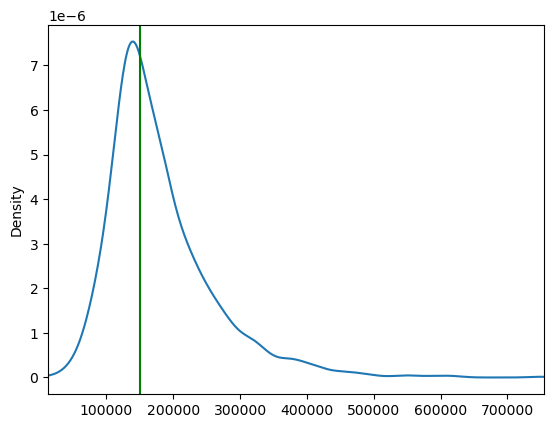

In [30]:
houses['SalePrice'].plot.kde(xlim = (houses['SalePrice'].min(),
                                  houses['SalePrice'].max()))

import matplotlib.pyplot as plt
plt.axvline(150000, color = 'Green')

This distribution is clearly right skewed. Generally, the location of the mode, median and mean is predictable for a right-skewed distribution:

+ Most values are concentrated in the left body of the distribution where they will form a peak — this is where the mode will be.

+ Remember that the median divides a distribution in two halves of equal length. For this reason, the median is usually positioned slightly right from the peak (the mode) for a right-skewed distribution.
+ The mean takes into account each value in the distribution, and it will be affected by the outliers in the right tail. This will generally pull the mean to the right of the median.

So in a right-skewed distribution, the mean will usually be to the right of the median, and the median will be to the right of the mode. This holds true for the distribution of the SalePrice variable:

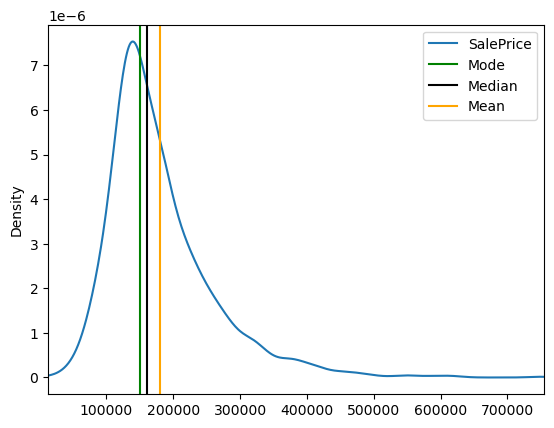

In [31]:
houses['SalePrice'].plot.kde(xlim = (houses['SalePrice'].min(),
                                     houses['SalePrice'].max()
                                    )
                            )
plt.axvline(150000, color = 'Green', label = 'Mode')
plt.axvline(houses['SalePrice'].median(), color = 'Black', label = 'Median')
plt.axvline(houses['SalePrice'].mean(), color = 'Orange', label = 'Mean')
plt.legend()

### Task

The distribution of the Mo Sold variable (which describes the month of a sale) is close to normal.
+ Plot a kernel density plot for this distribution using Series.plot.kde().
+ The lower boundary of the x-axis should be 1 and the upper one 12. You can use the xlim parameter of the Series.plot.kde() method.
    + Plot three vertical lines:
        + One for the mode — the color of the line should be green and its label should be 'Mode'.
        + One for the median — the color of the line should be orange and its label should be 'Median'.
        + One for the mean — the color of the line should be black and its label should be 'Mean'.
+ Display all the labels using a legend (you can activate the legend using plt.legend().

+ You should observe the mean, the median, and the mode clustered together in the center of the distribution.


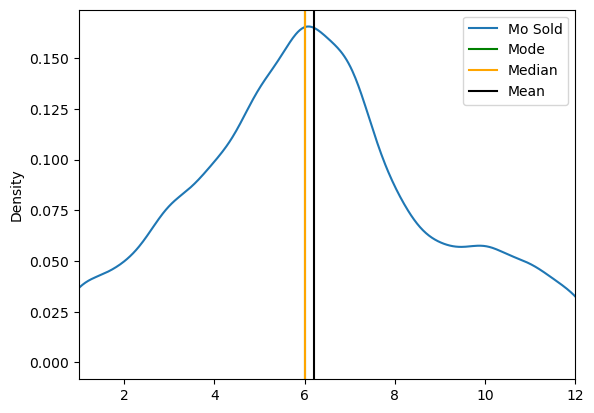

In [32]:
houses['Mo Sold'].plot.kde(xlim = (1,12))
plt.axvline(6, color = 'Green', label = 'Mode')
plt.axvline(houses['Mo Sold'].median(), color = 'Orange', label = 'Median')
plt.axvline(houses['Mo Sold'].mean(), color = 'Black', label = 'Mean')
plt.legend()


![Mean, Mode, Media](img/s2m3_summary.svg)